# DataAnalysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('promptCount (1).csv', delimiter=';')

print(data.head())

         Exam Set With AI Participant Task 1 Task 2 Task 3 Task 4 Task 5  \
0  Advertisements     Yes      Philip  107 1   91 1   69 1  114 1  146 1   
1          Robots      No      Philip    122    157     76    131    235   
2  Advertisements     Yes      Mattej  149 0  138 0  199 0  404 2  107 1   
3          Robots      No      Mattej    126     96     58    207    125   
4  Advertisements     Yes    Micheala  106 1    5 1   98 1  114 1   94 1   

  Task 6 Task 7  ... Task 2_points Task 3_points  Task 4_points Task 5_points  \
0   58 1   96 1  ...            10            15             20            15   
1     42    224  ...            10             5             20            15   
2  330 0  338 0  ...             5            15             18            15   
3     40    277  ...             9             5             20            15   
4   54 1    NaN  ...            10            15             17            15   

   Task 6_points  Task 7_points  Task 8_points  Task 9_p

## Calculate time and prompts

In [2]:
# Define a function to calculate total time spent
def calculate_total_time(row):
    total_time = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')  # Split based on space to separate time and binary indicator
            if len(parts) == 2:
                time_str = parts[0]  # Time is always the first part
            else:
                time_str = task  # Handle case where there's only a time value
            total_time += int(time_str)
    return total_time

# Define a function to calculate total prompt count
def calculate_total_prompt(row):
    total_prompt = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')  # Split based on space to separate time and binary indicator
            if len(parts) == 2:
                prompt_str = parts[1]  # Binary indicator (prompt) is the second part
                total_prompt += int(prompt_str)
    return total_prompt

task_columns = data.iloc[:, 3:11]

# Adjusted function applications to the correct column slice
data['Total_Time'] = task_columns.apply(calculate_total_time, axis=1)
data['Total_Prompt_Count'] = task_columns.apply(calculate_total_prompt, axis=1)

# Convert total time from seconds to minutes and round
data['Total_Time_Minutes'] = (data['Total_Time'] / 60).round(0)


print(data.head())


         Exam Set With AI Participant Task 1 Task 2 Task 3 Task 4 Task 5  \
0  Advertisements     Yes      Philip  107 1   91 1   69 1  114 1  146 1   
1          Robots      No      Philip    122    157     76    131    235   
2  Advertisements     Yes      Mattej  149 0  138 0  199 0  404 2  107 1   
3          Robots      No      Mattej    126     96     58    207    125   
4  Advertisements     Yes    Micheala  106 1    5 1   98 1  114 1   94 1   

  Task 6 Task 7  ... Task 5_points Task 6_points  Task 7_points Task 8_points  \
0   58 1   96 1  ...            15            15             25           NaN   
1     42    224  ...            15            10             13          18.0   
2  330 0  338 0  ...            15            15             25           NaN   
3     40    277  ...            15            10             14          25.0   
4   54 1    NaN  ...            15            15             25           NaN   

   Task 9_points  Total Points  Unit Test  Total_Time To

## Split data into four individual sets
### Sets for each exam set with and without AI

In [3]:
robots_with_ai = data.loc[(data['Exam Set'] == 'Robots') & (data['With AI'] == 'Yes')]

robots_without_ai = data.loc[(data['Exam Set'] == 'Robots') & (data['With AI'] == 'No')]

ads_with_ai = data.loc[(data['Exam Set'] == 'Advertisements') & (data['With AI'] == 'Yes')]

ads_without_ai = data.loc[(data['Exam Set'] == 'Advertisements') & (data['With AI'] == 'No')]

## Box plot on total time spent of each exam set

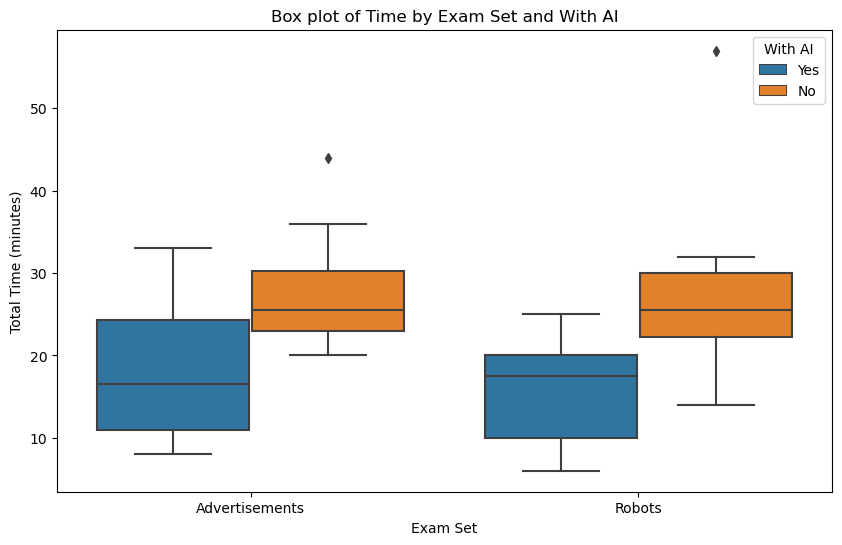

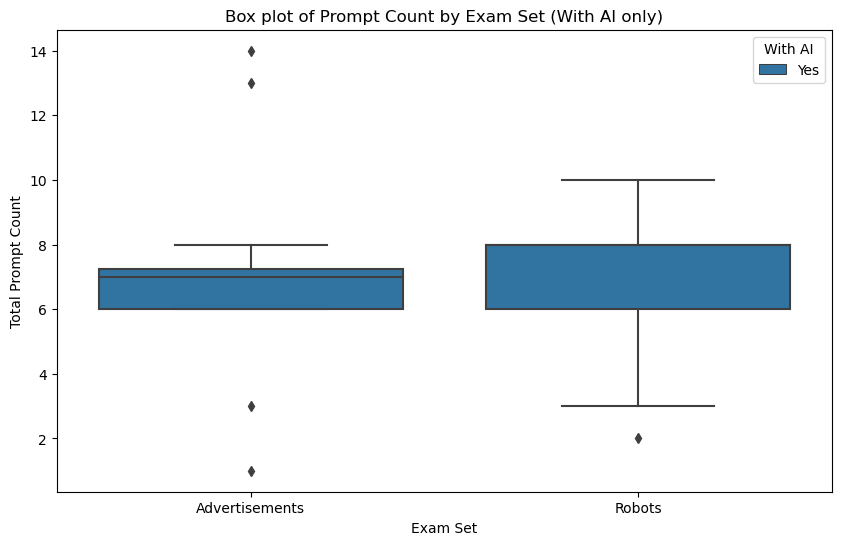

In [4]:
# Filter the DataFrame to include only rows where 'With AI' is 'Yes' or 'No'
data_with_ai = data[data['With AI'] == 'Yes']

data_filtered = data[data['With AI'].isin(['Yes', 'No'])]

# Create box plots for time
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total_Time_Minutes', hue='With AI', data=data_filtered)
plt.title('Box plot of Time by Exam Set and With AI')
plt.xlabel('Exam Set')
plt.ylabel('Total Time (minutes)')
plt.show()

# Create box plots for prompt count for exams with AI
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total_Prompt_Count', hue='With AI', data=data[data['With AI'] == 'Yes'])
plt.title('Box plot of Prompt Count by Exam Set (With AI only)')
plt.xlabel('Exam Set')
plt.ylabel('Total Prompt Count')
plt.show()



## Box plot on average time spent per task of each exam set

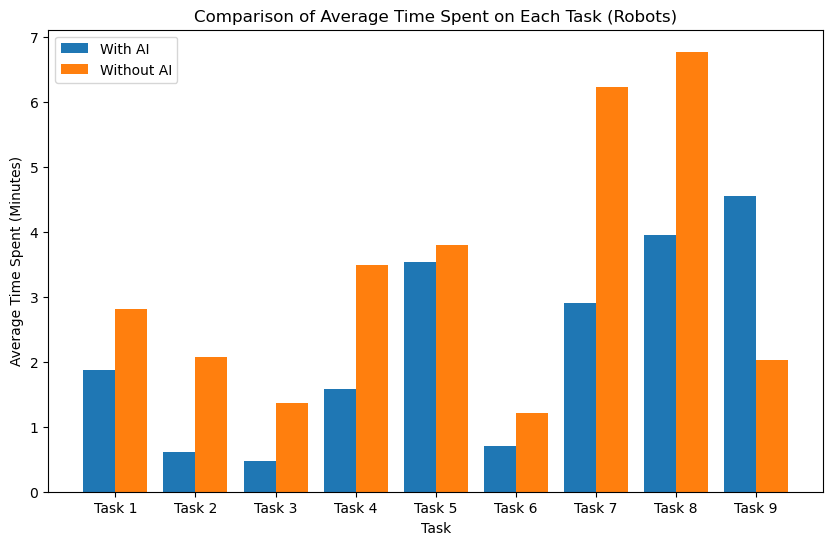

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (9).

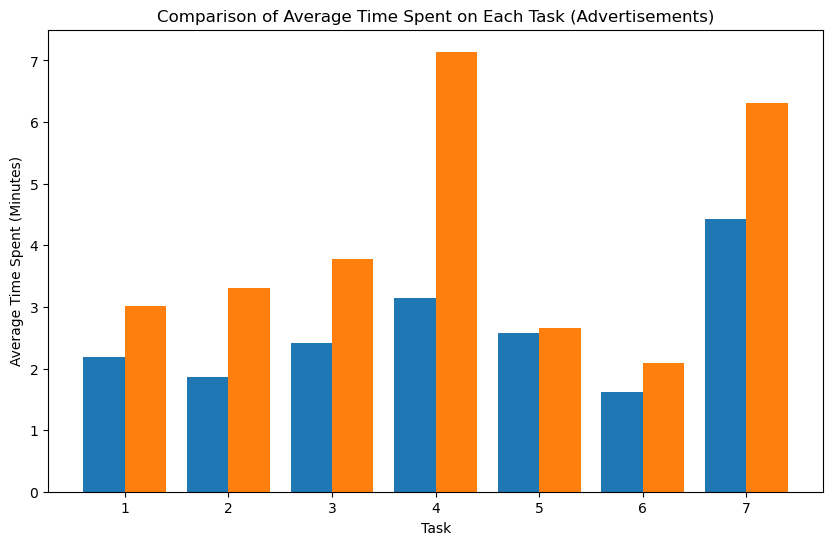

In [5]:
# Function to calculate average time spent per task
def calculate_average_time(task_series):
    total_time = 0
    count = 0
    for task in task_series:
        if pd.isna(task):  # Skip NaN values
            continue
        parts = task.split(' ')
        if len(parts) == 2:
            time_str = parts[0]
        else:
            time_str = task
        total_time += int(time_str)
        count += 1
    if count == 0:
        return np.nan  # Avoid division by zero
    return total_time / count / 60  # Convert to minutes

# Apply the function to calculate average time spent per task for both sets
avg_time_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

avg_time_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

# Extract task names
task_names = [f'Task {i}' for i in range(1, 10)]

# Plot for Robots
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in range(1, 10)], avg_time_with_ai_robots, width=0.4, label='With AI')
plt.bar([i + 0.2 for i in range(1, 10)], avg_time_without_ai_robots, width=0.4, label='Without AI')
plt.xlabel('Task')
plt.ylabel('Average Time Spent (Minutes)')
plt.title('Comparison of Average Time Spent on Each Task (Robots)')
plt.xticks(range(1, 10), task_names)
plt.legend()
plt.show()

# Plot for Advertisements
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in range(1, 10)], avg_time_with_ai_ads, width=0.4, label='With AI')
plt.bar([i + 0.2 for i in range(1, 10)], avg_time_without_ai_ads, width=0.4, label='Without AI')
plt.xlabel('Task')
plt.ylabel('Average Time Spent (Minutes)')
plt.title('Comparison of Average Time Spent on Each Task (Advertisements)')
plt.xticks(range(1, 8), task_names)
plt.legend()
plt.show()

## Compare total time spend between the use of AI on exam sets

In [6]:
total_time_with_ai_robots = robots_with_ai['Total_Time_Minutes'].sum()
total_time_without_ai_robots = robots_without_ai['Total_Time_Minutes'].sum()

total_time_with_ai_ads = ads_with_ai['Total_Time_Minutes'].sum()
total_time_without_ai_ads = ads_without_ai['Total_Time_Minutes'].sum()

# Calculate the percentage difference for each category
percent_difference_robots = (((total_time_without_ai_robots - total_time_with_ai_robots) / total_time_with_ai_robots) * 100).round(2)
percent_difference_ads = (((total_time_without_ai_ads - total_time_with_ai_ads) / total_time_with_ai_ads) * 100).round(2)

print("Total time spent on Robots without AI:", total_time_without_ai_robots, "minutes")
print("Total time spent on Robots with AI:", total_time_with_ai_robots, "minutes")
print("Total time used on tasks without AI in Robots are", percent_difference_robots, "% longer than with AI")

print("\nTotal time spent on Advertisements without AI:", total_time_without_ai_ads, "minutes")
print("Total time spent on Advertisements with AI:", total_time_with_ai_ads, "minutes")
print("Total time used on tasks without AI in Advertisements are", percent_difference_ads, "% longer than with AI")



Total time spent on Robots without AI: 325.0 minutes
Total time spent on Robots with AI: 156.0 minutes
Total time used on tasks without AI in Robots are 108.33 % longer than with AI

Total time spent on Advertisements without AI: 276.0 minutes
Total time spent on Advertisements with AI: 215.0 minutes
Total time used on tasks without AI in Advertisements are 28.37 % longer than with AI


## Statistically significan analysis

In [7]:
# For robots with AI
times_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')]['Total_Time_Minutes'].values

# For robots without AI
times_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')]['Total_Time_Minutes'].values

# Conduct the t-test
t_stat, p_value = ttest_ind(times_with_ai_robots, times_without_ai_robots)

print(f"T-statistic for exam set with Robots: {t_stat}, P-value: {p_value}")

# For robots with AI
times_with_ai_adv = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')]['Total_Time_Minutes'].values

# For robots without AI
times_without_ai_adv = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')]['Total_Time_Minutes'].values

# Conduct the t-test
t_stat, p_value = ttest_ind(times_with_ai_adv, times_without_ai_adv)

print(f"T-statistic for exam set with Advertisements: {t_stat}, P-value: {p_value}")


T-statistic for exam set with Robots: -2.9112587985261804, P-value: 0.00863416539011768
T-statistic for exam set with Advertisements: -2.8455292197444924, P-value: 0.00999579164151388


In [8]:
# Filter the data to include only every second row starting from the first one
filtered_data = data.iloc[::2]

# Convert specified columns to numeric, errors='coerce' will set non-convertible values to NaN
column_names = [
    'How many years of developer experience do you have?',
    'How many years of experience do you have with Java?',
    'How many months is it since you coded in Java?',
    'How many years of experience do you have with Visual Studio Code?',
    'How much experience in years do you have in using an LLM(ChatGPT, CoPilot, Gemini)?'
]

for column in column_names:
    filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')

# Rename dictionary for columns
rename_dict = {
    'How many years of developer experience do you have?': 'Dev Exp (Years)',
    'How many years of experience do you have with Java?': 'Java Exp (Years)',
    'How many months is it since you coded in Java?': 'Java Coding Gap (Years)',
    'How many years of experience do you have with Visual Studio Code?': 'VS Code Exp (Years)',
    'How much experience in years do you have in using an LLM(ChatGPT, CoPilot, Gemini)?': 'LLM Exp (Years)'
}

# Rename the columns in the DataFrame
filtered_data.rename(columns=rename_dict, inplace=True)

# Now perform numeric conversion for the renamed columns
for column in rename_dict.values():  # Using new column names
    filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')

# Convert 'Java Coding Gap (Years)' correctly from months to years
filtered_data['Java Coding Gap (Years)'] = filtered_data['Java Coding Gap (Years)'] / 12

# Calculate averages with the renamed and converted columns
averages = filtered_data[rename_dict.values()].mean()

# Print the averages
for column, average in averages.items():
    print(f"The average input of '{column}' = {average:.2f}")

The average input of 'Dev Exp (Years)' = 1.93
The average input of 'Java Exp (Years)' = 1.40
The average input of 'Java Coding Gap (Years)' = 0.38
The average input of 'VS Code Exp (Years)' = 2.17
The average input of 'LLM Exp (Years)' = 1.03


C:\Users\chris\AppData\Local\Temp\ipykernel_28740\3038128827.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')
C:\Users\chris\AppData\Local\Temp\ipykernel_28740\3038128827.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns=rename_dict, inplace=True)
C:\Users\chris\AppData\Local\Temp\ipykernel_28740\3038128827.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

### Average years of experience

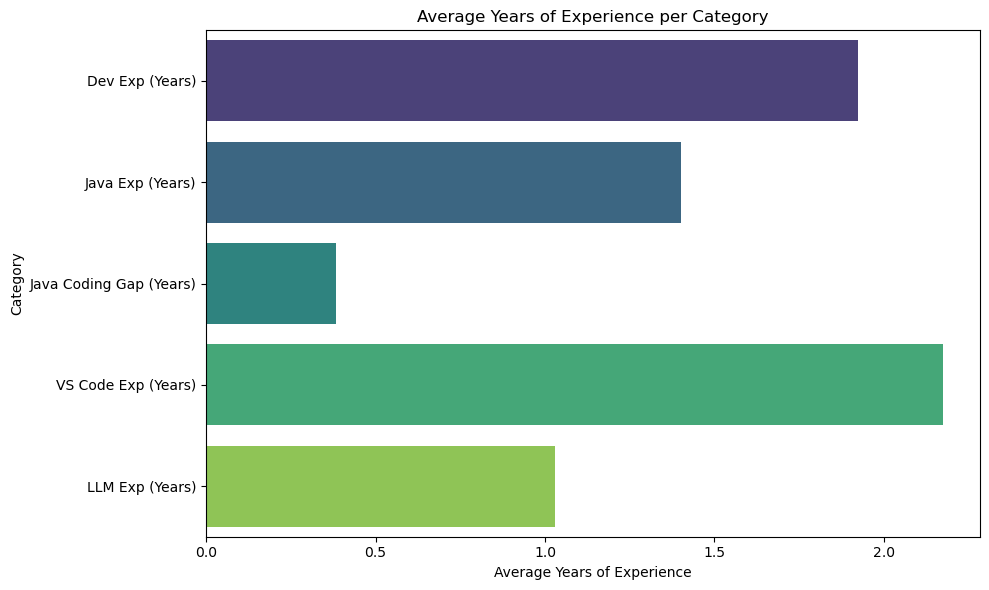

In [9]:
average_df = averages.reset_index()
average_df.columns = ['Category', 'Average Years']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Years', y='Category', data=average_df, palette="viridis")
plt.title('Average Years of Experience per Category')
plt.xlabel('Average Years of Experience')
plt.ylabel('Category')

plt.tight_layout()
plt.show()

### Grouping developer experience and total time spend on experiment

Participants per Experience Group:
0            1
1            2
1.5 years    5
2            9
3            1
4            2
NaN          2
Name: Dev Exp Group, dtype: int64


C:\Users\chris\AppData\Local\Temp\ipykernel_28740\1404648620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Dev Exp (Years)'] = pd.to_numeric(filtered_data['Dev Exp (Years)'], errors='coerce')
C:\Users\chris\AppData\Local\Temp\ipykernel_28740\1404648620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Dev Exp Group'] = filtered_data['Dev Exp (Years)'].apply(
C:\Users\chris\AppData\Local\Temp\ipykernel_28740\1404648620.py:15: SettingWithCopyWarning: 
A value is trying to

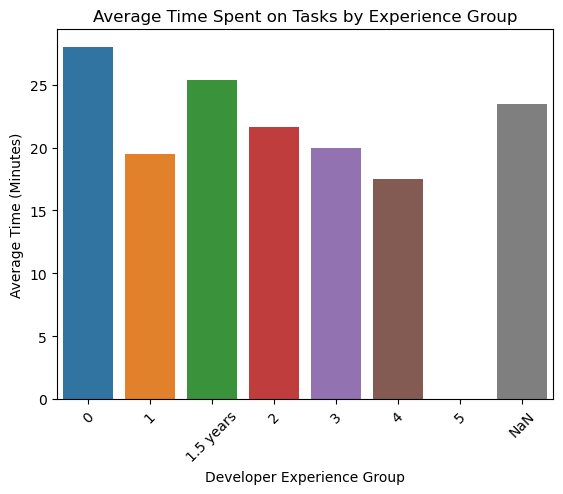

In [10]:
# Ensure 'Dev Exp (Years)' is correctly converted to numeric, with NaN preserved
filtered_data['Dev Exp (Years)'] = pd.to_numeric(filtered_data['Dev Exp (Years)'], errors='coerce')

# Adjust the lambda function for more precise handling, especially for 1.5 years
filtered_data['Dev Exp Group'] = filtered_data['Dev Exp (Years)'].apply(
    lambda x: '1.5 years' if not pd.isnull(x) and abs(x - 1.5) < 0.01 else
              str(int(min(x, 5))) if not pd.isnull(x) else 'NaN')

# Recalculate the counts for each group, ensuring all are strings for consistency
exp_group_counts = filtered_data['Dev Exp Group'].value_counts().sort_index()
print("Participants per Experience Group:")
print(exp_group_counts)

# For analysis and plotting, consider converting 'Dev Exp Group' to Categorical type for better handling
filtered_data['Dev Exp Group'] = pd.Categorical(filtered_data['Dev Exp Group'], 
                                                categories=['0', '1', '1.5 years', '2', '3', '4', '5', 'NaN'],
                                                ordered=True)

# Recalculate average time and plot with corrected groups
average_time_by_exp_group = filtered_data.groupby('Dev Exp Group')['Total_Time_Minutes'].mean()

sns.barplot(x=average_time_by_exp_group.index, y=average_time_by_exp_group.values)
plt.title('Average Time Spent on Tasks by Experience Group')
plt.xlabel('Developer Experience Group')
plt.ylabel('Average Time (Minutes)')
plt.xticks(rotation=45)
plt.show()

### Statistical significant of operatingsystem and total time spend on experiment

In [11]:
windows_times = filtered_data[filtered_data['Which operating system do you usually use'] == 'Windows']['Total_Time_Minutes']
macos_times = filtered_data[filtered_data['Which operating system do you usually use'] == 'MacOS']['Total_Time_Minutes']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(windows_times, macos_times, equal_var=True)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -0.3007627279266278
P-value: 0.7672427076413045


### Difference between Operating system and 'Total Time Minutes

In [12]:
# Calculate the total time spent on tasks for each operating system
total_points_windows = filtered_data[filtered_data['Which operating system do you usually use'] == 'Windows']['Total Points'].sum()
total_time_windows = filtered_data[filtered_data['Which operating system do you usually use'] == 'Windows']['Total_Time_Minutes'].sum()
total_points_macos = filtered_data[filtered_data['Which operating system do you usually use'] == 'MacOS']['Total Points'].sum()
total_time_macos = filtered_data[filtered_data['Which operating system do you usually use'] == 'MacOS']['Total_Time_Minutes'].sum()

# Print out the total time in minutes per operating system
print("Total time spent on tasks for Windows users:", total_time_windows)
print("Total time spent on tasks for MacOS users:", total_time_macos)
print("Total points on tasks for Windows users:", total_points_windows)
print("Total points on tasks for MacOS users:", total_points_macos) 

Total time spent on tasks for Windows users: 123.0
Total time spent on tasks for MacOS users: 285.0
Total points on tasks for Windows users: 594
Total points on tasks for MacOS users: 1280


### Correlation between 'Java Experience' and 'Total Time Minutes

In [13]:
# Filter out rows with NaN values in either column
java_exp_filtered = filtered_data.dropna(subset=['Java Exp (Years)', 'Total_Time_Minutes'])

# Calculate the correlation coefficient between Java experience and total time
correlation_coefficient = java_exp_filtered['Java Exp (Years)'].corr(java_exp_filtered['Total_Time_Minutes'])

# Print the correlation coefficient
print("Correlation Coefficient between Java Experience and Total Time:", correlation_coefficient)


Correlation Coefficient between Java Experience and Total Time: -0.2074008563836506


### Correlation between 'Java Coding Gap' and 'Total Time Minutes

In [14]:
# Filter out rows with NaN values in either column
java_coding_gap_filtered = filtered_data.dropna(subset=['Java Coding Gap (Years)', 'Total_Time_Minutes'])

# Calculate the correlation coefficient between Java coding gap and total time
correlation_coefficient_months = java_coding_gap_filtered['Java Coding Gap (Years)'].corr(java_coding_gap_filtered['Total_Time_Minutes'])

# Print the correlation coefficient
print("Correlation Coefficient between Java Coding Gap and Total Time:", correlation_coefficient_months)


Correlation Coefficient between Java Coding Gap and Total Time: 0.26635366484959544


## Average points

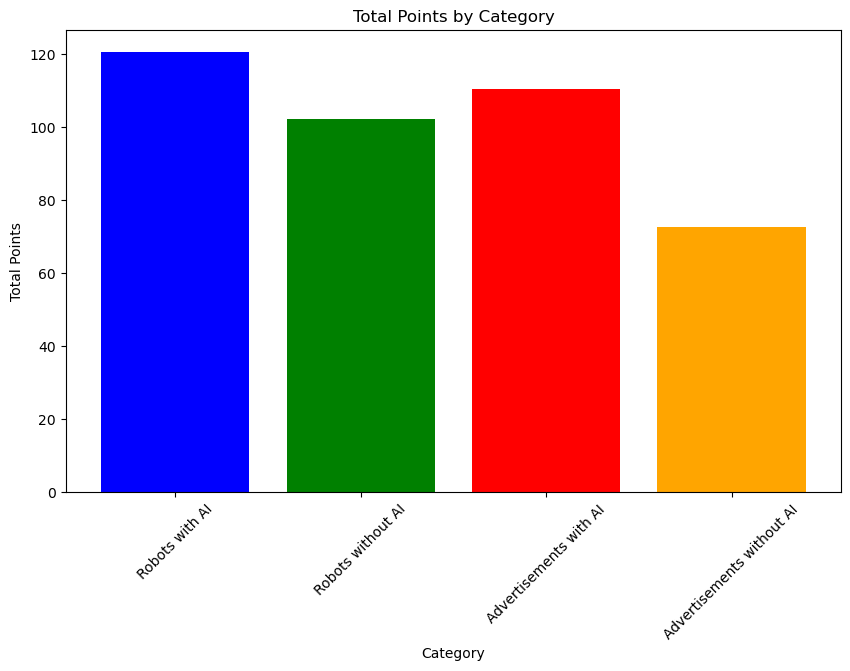

In [15]:
# Calculate average points for each category
robots_with_ai_avg_points = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')]['Total Points'].mean()
robots_without_ai_avg_points = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')]['Total Points'].mean()
ads_with_ai_avg_points = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')]['Total Points'].mean()
ads_without_ai_avg_points = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')]['Total Points'].mean()

totals = [
    robots_with_ai_avg_points,
    robots_without_ai_avg_points,
    ads_with_ai_avg_points,
    ads_without_ai_avg_points
]

# Create a list of category names
categories = [
    'Robots with AI',
    'Robots without AI',
    'Advertisements with AI',
    'Advertisements without AI'
]

# Plotting the total points by category
plt.figure(figsize=(10, 6))
plt.bar(categories, totals, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Category')
plt.ylabel('Total Points')
plt.title('Total Points by Category')
plt.xticks(rotation=45)
plt.show()

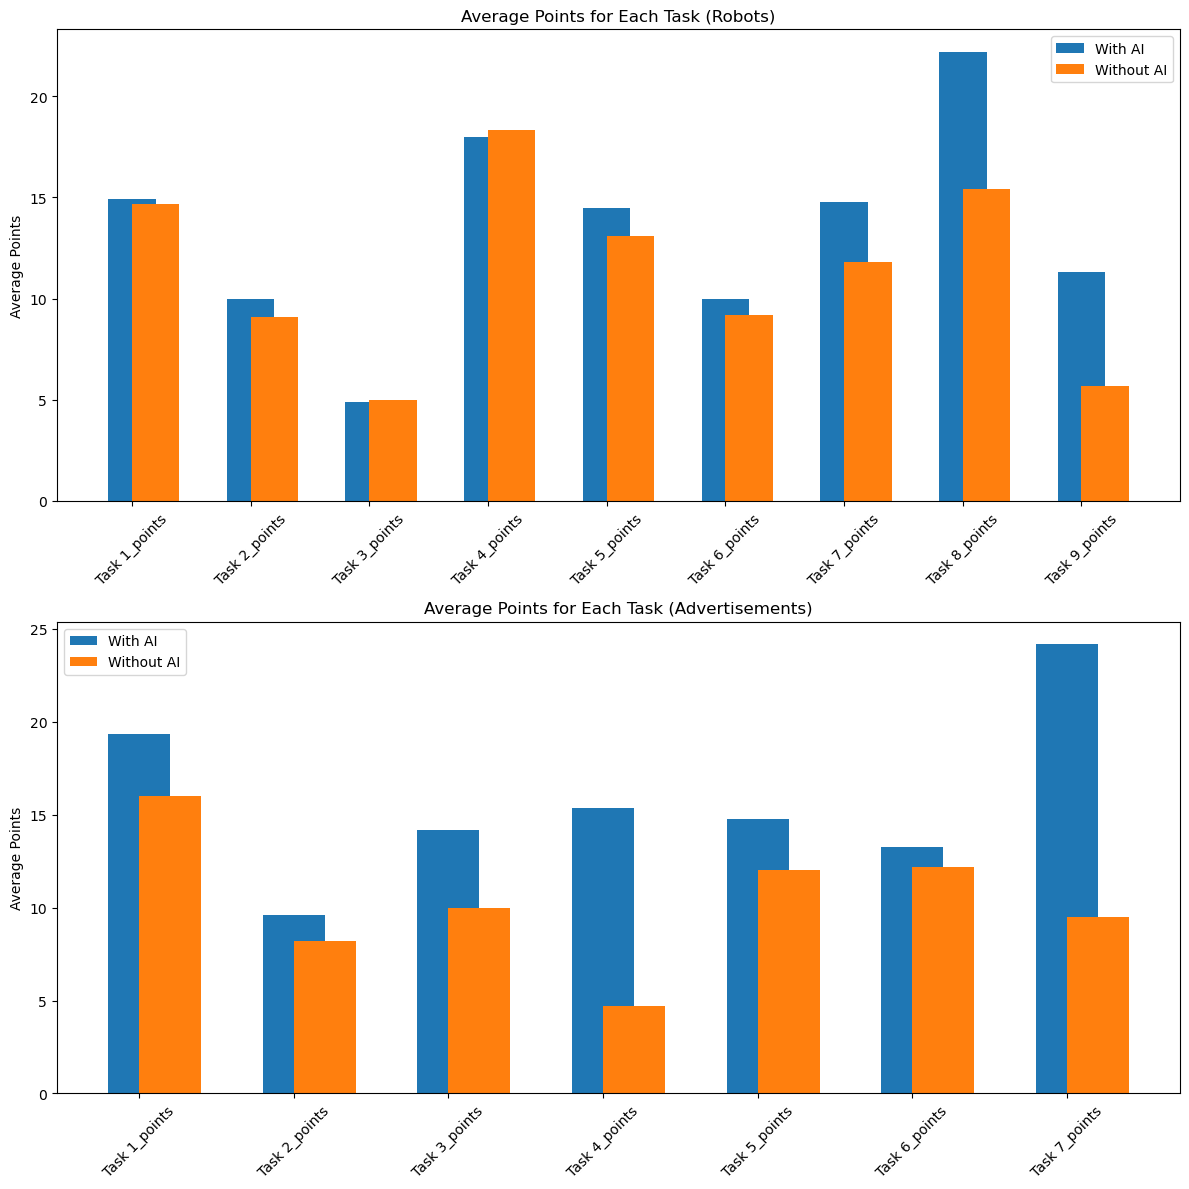

In [16]:
# Filtering data for each set
data_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')]
data_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')]
data_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')]
data_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')]

# Assuming tasks are from Task 1 to Task 9
task_columns = ['Task 1_points', 'Task 2_points', 'Task 3_points', 'Task 4_points', 'Task 5_points', 'Task 6_points', 'Task 7_points', 'Task 8_points', 'Task 9_points']

# Calculating averages
avg_points_with_ai_robots = data_with_ai_robots[task_columns].mean()
avg_points_without_ai_robots = data_without_ai_robots[task_columns].mean()
avg_points_with_ai_ads = data_with_ai_ads[task_columns].mean()
avg_points_without_ai_ads = data_without_ai_ads[task_columns].mean()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Robots
axs[0].bar(task_columns, avg_points_with_ai_robots, width=0.4, label='With AI', align='center')
axs[0].bar(task_columns, avg_points_without_ai_robots, width=0.4, label='Without AI', align='edge')
axs[0].set_ylabel('Average Points')
axs[0].set_title('Average Points for Each Task (Robots)')
axs[0].legend()

# Advertisements
axs[1].bar(task_columns, avg_points_with_ai_ads, width=0.4, label='With AI', align='center')
axs[1].bar(task_columns, avg_points_without_ai_ads, width=0.4, label='Without AI', align='edge')
axs[1].set_ylabel('Average Points')
axs[1].set_title('Average Points for Each Task (Advertisements)')
axs[1].legend()

for ax in axs:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [17]:
column_names = data.columns
print(column_names)

Index(['Exam Set', 'With AI', 'Participant', 'Task 1', 'Task 2', 'Task 3',
       'Task 4', 'Task 5', 'Task 6', 'Task 7', 'Task 8', 'Task 9',
       'What is your age?', 'In what subject was your bachelor?',
       'How many years of developer experience do you have?',
       'How many years of experience do you have with Java?',
       'How many months is it since you coded in Java?',
       'How many years of experience do you have with Visual Studio Code?',
       'How much experience in years do you have in using an LLM(ChatGPT, CoPilot, Gemini)?',
       'Which operating system do you usually use', 'Task 1_points',
       'Task 2_points', 'Task 3_points', 'Task 4_points', 'Task 5_points',
       'Task 6_points', 'Task 7_points', 'Task 8_points', 'Task 9_points',
       'Total Points', 'Unit Test', 'Total_Time', 'Total_Prompt_Count',
       'Total_Time_Minutes'],
      dtype='object')


In [18]:

# Assuming you have already loaded your DataFrame as `data`

# Converting 'Java Coding Gap' from months to years
data['Java Coding Gap (Years)'] = data['How many months is it since you coded in Java?'] / 12

# Calculate the correlation for 'Java Exp (Years)'
correlation_java_exp = data['How many years of experience do you have with Java?'].corr(data['Total Points'])
print("Correlation between Java Experience and Total Points:", correlation_java_exp)

# Calculate the correlation for 'Java Coding Gap (Years)'
correlation_java_gap = data['Java Coding Gap (Years)'].corr(data['Total Points'])
print("Correlation between Java Coding Gap and Total Points:", correlation_java_gap)


Correlation between Java Experience and Total Points: 0.09414678652370449
Correlation between Java Coding Gap and Total Points: -0.13767715273941208


In [19]:
# Categorize Developer experience into bins
bins = [0, 2.5, 3, np.inf]  # Adjust bins as necessary
labels = ['Low', 'Medium', 'High']
data['Developer Experience Category'] = pd.cut(data['How many years of developer experience do you have?'], bins=bins, labels=labels, include_lowest=True)

# Group by the new category
grouped = data.groupby('Developer Experience Category')['Total Points'].mean()

# ANOVA across the different Developer experience levels
anova_results = f_oneway(
    data[data['Developer Experience Category'] == 'Low']['Total Points'].dropna(),
    data[data['Developer Experience Category'] == 'Medium']['Total Points'].dropna(),
    data[data['Developer Experience Category'] == 'High']['Total Points'].dropna(),
)

print("ANOVA results (F-statistic, p-value):", anova_results)
print("Average Total Points by 'Developer Experience Category':", grouped)


ANOVA results (F-statistic, p-value): F_onewayResult(statistic=0.8669250634489515, pvalue=0.4380119699005268)
Average Total Points by 'Developer Experience Category': Developer Experience Category
Low        96.647059
Medium     77.000000
High      114.500000
Name: Total Points, dtype: float64


In [20]:
# Convert comma to dot in numeric strings and convert columns to numeric
cols_to_convert = ['How many years of developer experience do you have?',
                   'How many years of experience do you have with Java?',
                   'How many months is it since you coded in Java?',
                   'How many years of experience do you have with Visual Studio Code?',
                   'How much experience in years do you have in using an LLM(ChatGPT, CoPilot, Gemini)?']

for col in cols_to_convert:
    data[col] = data[col].astype(str).str.replace(',', '.').astype(float)

# Prepare data for clustering
experience_data = data[cols_to_convert]



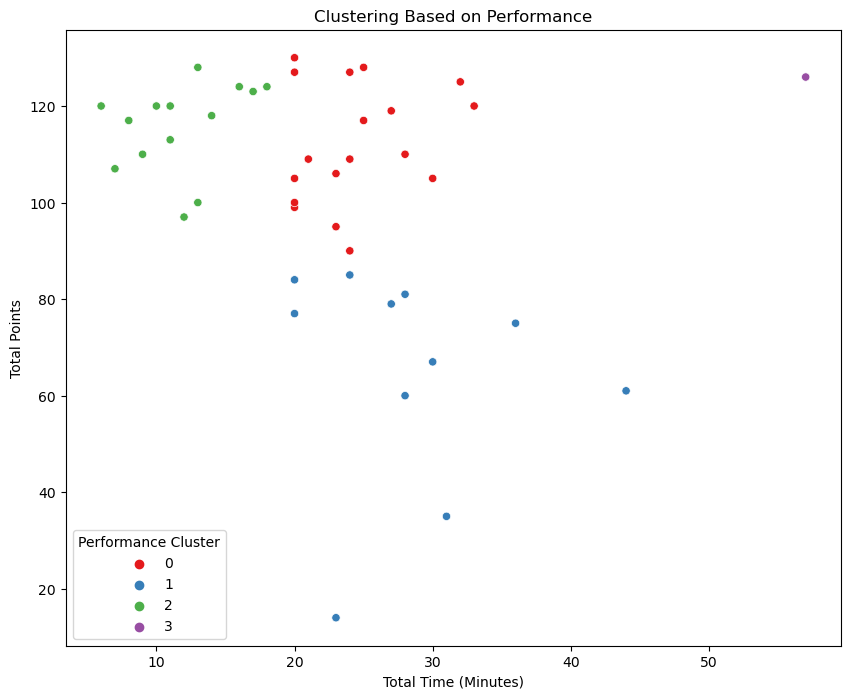

In [21]:
# Mockup performance data for demonstration
performance_data = data[['Total Points', 'Total_Time_Minutes']]

# Scale performance data
scaler = StandardScaler()
performance_scaled = scaler.fit_transform(performance_data)

# Apply clustering
kmeans_performance = KMeans(n_clusters=4, random_state=42)
performance_clusters = kmeans_performance.fit_predict(performance_scaled)
data['Performance Cluster'] = performance_clusters

# Plot to visualize the performance-based clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=performance_data['Total_Time_Minutes'], y=performance_data['Total Points'], hue=data['Performance Cluster'], palette='Set1')
plt.title('Clustering Based on Performance')
plt.xlabel('Total Time (Minutes)')
plt.ylabel('Total Points')
plt.legend(title='Performance Cluster')
plt.show()


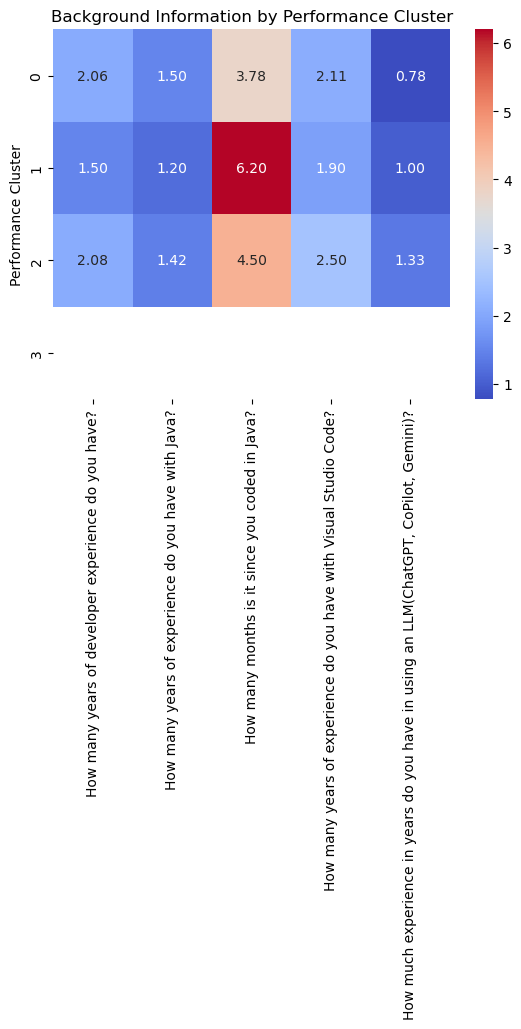

In [22]:
# Examine the average background information for each performance cluster
background_info_by_cluster = data.groupby('Performance Cluster')[cols_to_convert].mean()

# You can visualize this using a bar plot, heatmap, or other suitable visualization methods
# Here's an example using a heatmap for the average values

sns.heatmap(background_info_by_cluster, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Background Information by Performance Cluster')
plt.show()


C:\Users\chris\AppData\Local\Temp\ipykernel_28740\1277980319.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1_2['Cluster'] = apply_clustering(group_1_2, n_clusters=2)
C:\Users\chris\AppData\Local\Temp\ipykernel_28740\1277980319.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3_4['Cluster'] = apply_clustering(group_3_4, n_clusters=2)
C:\Users\chris\AppData\Local\Temp\ipykernel_28740\1277980319.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

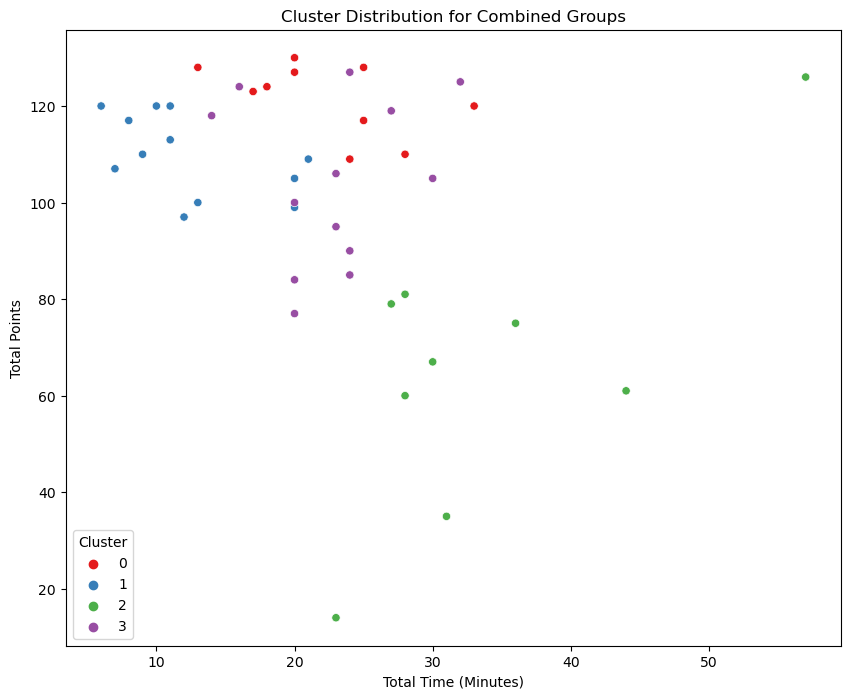

In [23]:

# Let's define your combined groups
group_1_2 = data.loc[(data['Exam Set'] == 'Robots') & (data['With AI'] == 'Yes') | 
                     (data['Exam Set'] == 'Advertisements') & (data['With AI'] == 'Yes')]
group_3_4 = data.loc[(data['Exam Set'] == 'Robots') & (data['With AI'] == 'No') | 
                     (data['Exam Set'] == 'Advertisements') & (data['With AI'] == 'No')]

# Function to apply clustering
def apply_clustering(group_data, n_clusters=2):
    # Prepare performance data for clustering
    performance_data = group_data[['Total Points', 'Total_Time_Minutes']]
    
    # Normalize the performance data
    scaler = StandardScaler()
    performance_scaled = scaler.fit_transform(performance_data)
    
    # Apply clustering to this segment
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(performance_scaled)
    
    return cluster_labels

# Applying clustering to each group
group_1_2['Cluster'] = apply_clustering(group_1_2, n_clusters=2)
group_3_4['Cluster'] = apply_clustering(group_3_4, n_clusters=2)

# Adjust the cluster labels for the second group to differentiate from the first group
group_3_4['Cluster'] += 2  # Now clusters will be 2 and 3 instead of 0 and 1

# Combine the groups back into one DataFrame
combined_data = pd.concat([group_1_2, group_3_4])

# Visualize the clusters for the combined data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Total_Time_Minutes', y='Total Points', data=combined_data, hue='Cluster', palette='Set1')
plt.title('Cluster Distribution for Combined Groups')
plt.xlabel('Total Time (Minutes)')
plt.ylabel('Total Points')
plt.legend(title='Cluster')
plt.show()


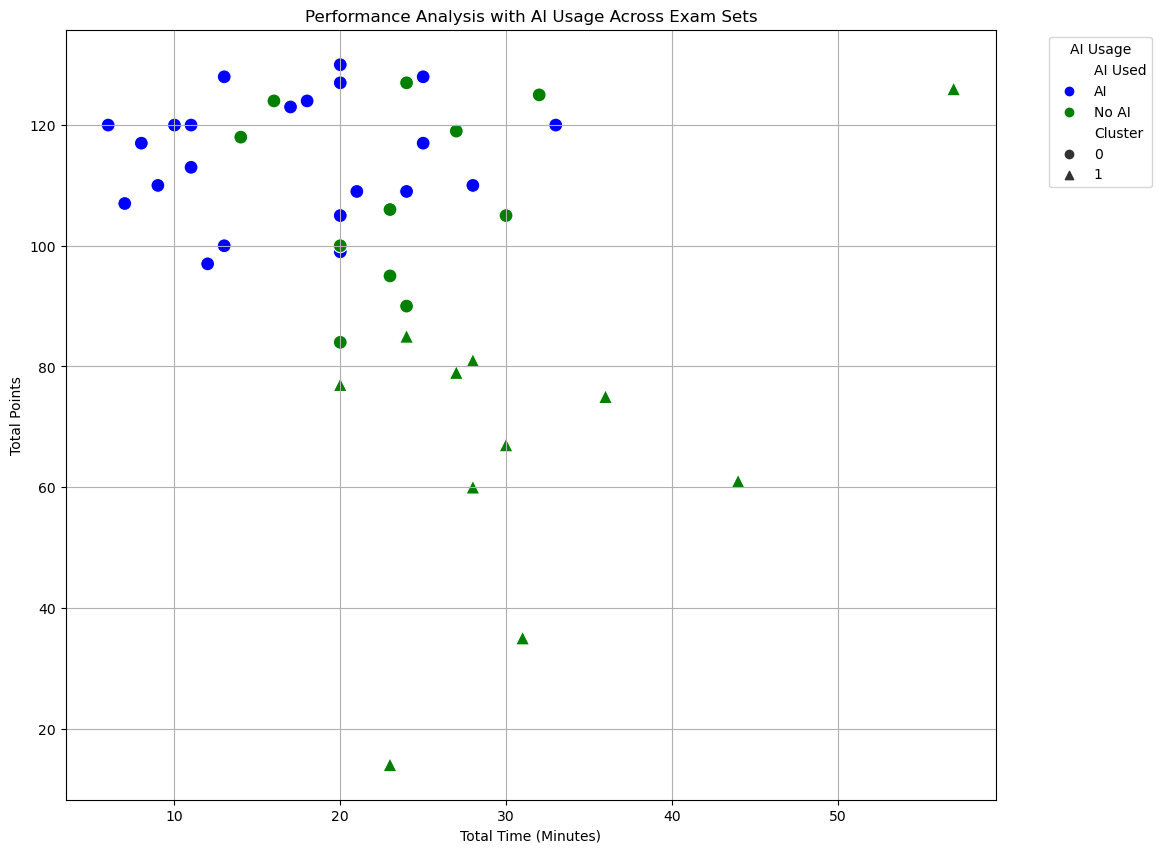

In [24]:

# Function to apply clustering
def apply_clustering(group_data, n_clusters=2):
    performance_data = group_data[['Total Points', 'Total_Time_Minutes']]
    scaler = StandardScaler()
    performance_scaled = scaler.fit_transform(performance_data)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    return kmeans.fit_predict(performance_scaled)

# Preparing the data for visualization
data['AI Used'] = data['With AI'].map({'Yes': 'AI', 'No': 'No AI'})  # Mapping 'Yes' to 'AI' and 'No' to 'No AI'

# Apply clustering
data['Cluster'] = apply_clustering(data, 2)

# Plotting
plt.figure(figsize=(12, 10))
palette = {'AI': 'blue', 'No AI': 'green'}  # Define the color palette
sns.scatterplot(x='Total_Time_Minutes', y='Total Points', data=data,
                hue='AI Used', palette=palette, style='Cluster',
                markers=['o', '^'], s=100)  # Different markers for clusters

plt.title('Performance Analysis with AI Usage Across Exam Sets')
plt.xlabel('Total Time (Minutes)')
plt.ylabel('Total Points')
plt.legend(title='AI Usage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


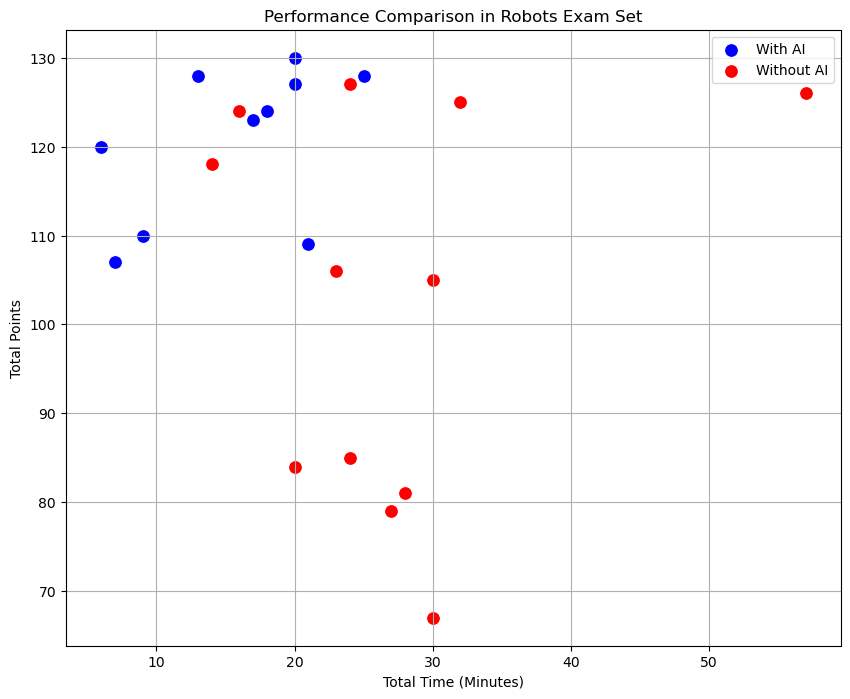

In [25]:


# Mock-up example, assuming 'data' DataFrame has 'Participant_ID', 'Exam Set', 'With AI', 'Total Points', and 'Total_Time_Minutes'
# Here's how you would structure the data assuming the participant IDs are consistent across exam sets and methods:

# Pivot the data to get AI and No AI side by side for each participant in each exam set
pivot_data = data.pivot_table(index=['Participant', 'Exam Set'], columns='With AI', 
                              values=['Total Points', 'Total_Time_Minutes'], aggfunc='first')

# Flatten the columns multi-index
pivot_data.columns = ['_'.join(col).strip() for col in pivot_data.columns.values]
pivot_data.reset_index(inplace=True)

# Example plot for one exam set, comparing AI vs No AI in Total Points
exam_set = 'Robots'  # Choose your exam set
filtered_data = pivot_data[pivot_data['Exam Set'] == exam_set]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=filtered_data, x='Total_Time_Minutes_Yes', y='Total Points_Yes', color='blue', label='With AI', s=100)
sns.scatterplot(data=filtered_data, x='Total_Time_Minutes_No', y='Total Points_No', color='red', label='Without AI', s=100)

# Optionally, connect points for the same participant
for _, row in filtered_data.iterrows():
    plt.plot([row['Total_Time_Minutes_Yes'], row['Total_Time_Minutes_No']], 
             [row['Total Points_Yes'], row['Total Points_No']], 'gray', linestyle='--')

plt.title('Performance Comparison in Robots Exam Set')
plt.xlabel('Total Time (Minutes)')
plt.ylabel('Total Points')
plt.legend()
plt.grid(True)
plt.show()


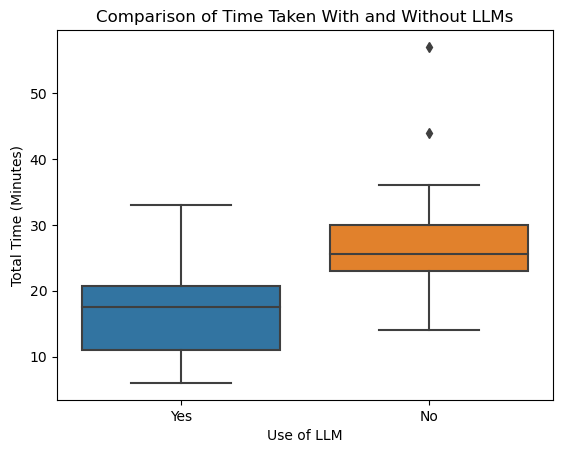

In [26]:
sns.boxplot(data=data, x='With AI', y='Total_Time_Minutes')
plt.title('Comparison of Time Taken With and Without LLMs')
plt.xlabel('Use of LLM')
plt.ylabel('Total Time (Minutes)')
plt.show()


In [32]:
robots_with_ai_avg_unit_test_points = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')]['Unit Test'].mean()
robots_without_ai_avg_unit_test_points = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')]['Unit Test'].mean()
ads_with_ai_avg_unit_test_points = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')]['Unit Test'].mean()
ads_without_ai_avg_unit_test_points = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')]['Unit Test'].mean()

print("Robots WITH AI Unit test average score:", robots_with_ai_avg_unit_test_points)
print("Robots WITHOUT AI Unit test average score:", robots_without_ai_avg_unit_test_points)
print("Advertisement WITH AI Unit test average score:", ads_with_ai_avg_unit_test_points)
print("Advertisement WITHOUT AI Unit test average score:", ads_without_ai_avg_unit_test_points)

Robots WITH AI Unit test average score: 100.6
Robots WITHOUT AI Unit test average score: 80.16666666666667
Advertisement WITH AI Unit test average score: 92.33333333333333
Advertisement WITHOUT AI Unit test average score: 60.5


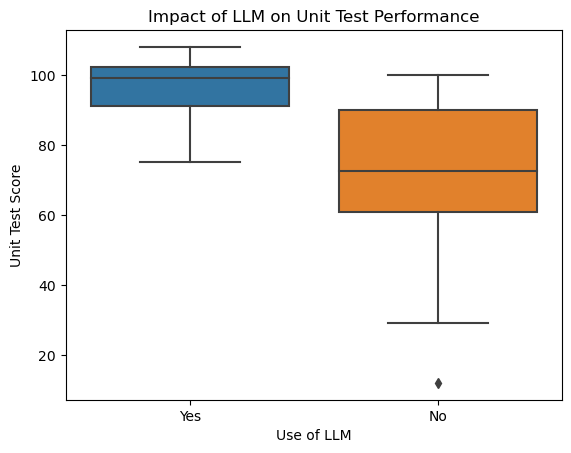

In [27]:
sns.boxplot(data=data, x='With AI', y='Unit Test')  # Update this line if 'Unit Test' is the column name
plt.title('Impact of LLM on Unit Test Performance')
plt.xlabel('Use of LLM')
plt.ylabel('Unit Test Score')  # Change this label to match the meaning of the 'Unit Test' column
plt.show()

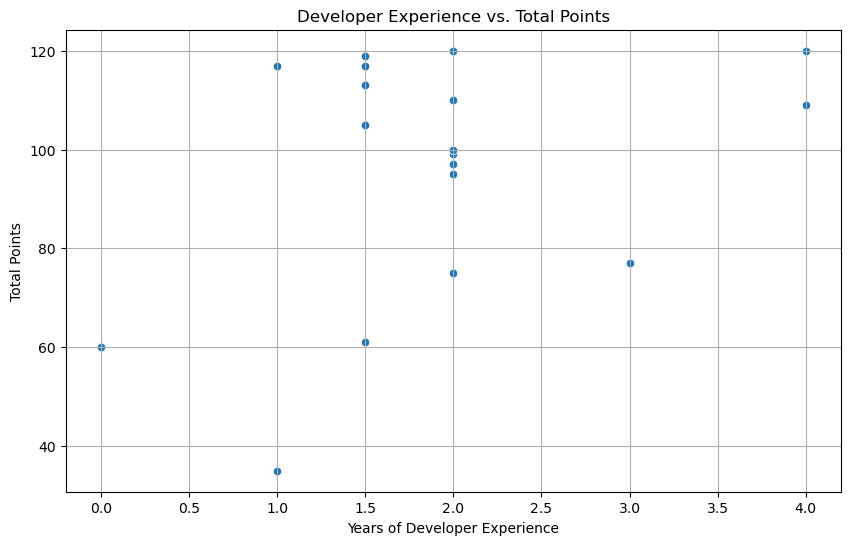

Correlation coefficient: 0.3613311783397393
T-test results -- t-statistic: nan , p-value: nan


In [33]:

# Assuming 'data' is your DataFrame that includes the necessary columns

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='How many years of developer experience do you have?', y='Total Points')
plt.title('Developer Experience vs. Total Points')
plt.xlabel('Years of Developer Experience')
plt.ylabel('Total Points')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation = data['How many years of developer experience do you have?'].corr(data['Total Points'])
print("Correlation coefficient:", correlation)

# Statistical Analysis: Compare means between the high and low points groups
# Define high and low points groups based on some criteria, for example, median split
median_points = data['Total Points'].median()
high_points_group = data[data['Total Points'] >= median_points]
low_points_group = data[data['Total Points'] < median_points]

from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(high_points_group['How many years of developer experience do you have?'],
                          low_points_group['How many years of developer experience do you have?'])

print("T-test results -- t-statistic:", t_stat, ", p-value:", p_val)


In [34]:
robots_with_ai_avg_points = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')]['Total Points'].mean()
robots_without_ai_avg_points = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')]['Total Points'].mean()
ads_with_ai_avg_points = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')]['Total Points'].mean()
ads_without_ai_avg_points = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')]['Total Points'].mean()

print("Robots WITH AI Unit test average score:", robots_with_ai_avg_points)
print("Robots WITHOUT AI Unit test average score:", robots_without_ai_avg_points)
print("Advertisement WITH AI Unit test average score:", ads_with_ai_avg_points)
print("Advertisement WITHOUT AI Unit test average score:", ads_without_ai_avg_points)

Robots WITH AI Unit test average score: 120.6
Robots WITHOUT AI Unit test average score: 102.25
Advertisement WITH AI Unit test average score: 110.58333333333333
Advertisement WITHOUT AI Unit test average score: 72.6
